<a href="https://colab.research.google.com/github/Indrejue/Build-week-1/blob/master/Healthcare_build_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# import the libraries needed for preparing the information
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.pyplot import figure
plt.style.use('dark_background')#because i like dark mode

In [2]:
ranking = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/Ranking%20additions.csv')
ranking.head()

,Country Name,GDP total rank,GDP per capita Rank,year achieved universal health care,Type of system,healthcare Rank,population 2020
0,Andorra,162,27,NaN,NaN,4.0,77.265
1,Argentina,24,69,NaN,NaN,75.0,45195.774
2,Australia,13,13,1975.0,Two Tier,32.0,25499.884
3,Austria,26,17,1967.0,Insurance Mandate,9.0,9006.398
4,Belgium,23,22,1945.0,Insurance Mandate,21.0,11589.623


In [5]:
#convert systems of ranking into 4 indicators
ranking['Type of system']= ranking['Type of system'].replace({np.NaN:0, 'Single Payer':1,'Two-Tier':2,'Two Tier':2,'Insurance Mandate':3})
ranking

,Country Name,GDP total rank,GDP per capita Rank,year achieved universal health care,Type of system,healthcare Rank,population 2020
0,Andorra,162,27,NaN,0,4.0,77.265
1,Argentina,24,69,NaN,0,75.0,45195.774
2,Australia,13,13,1975.0,2,32.0,25499.884
3,Austria,26,17,1967.0,3,9.0,9006.398
4,Belgium,23,22,1945.0,3,21.0,11589.623
5,Brazil,9,85,NaN,0,NaN,NaN
6,Canada,10,23,1966.0,1,30.0,37742.154
7,Cayman Islands,153,4,NaN,0,NaN,NaN
8,China,2,79,NaN,0,NaN,NaN
9,Denmark,36,12,1973.0,2,34.0,5792.202


In [4]:
#import the variouse csv files to begin minipulating and ploting graphs
per_cap_spend = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20spending%20per%20capita.csv')
per_gdp_spend = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20spending%20gdp.csv')
tax_of_gdp = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20Tax%20revenue.csv')
doc_per_1k = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20doctors%20per%20capita.csv')
nurse_per_1k = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20nurses%20per%20capita.csv')
bed_per_1k = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20hospital%20beds%20per%20capita.csv')
health_extenal_spend_percent= pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20external%20spend%20percent%20of%20health.csv',)
health_gov_spend_percent = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20gov%20spend%20percent%20of%20health.csv')
health_outofpocket_spend_percent = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20out%20of%20p%20spend%20percent%20of%20health.csv')
health_prvt_spend_percent = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20private%20spend%20percent%20of%20health.csv')
death_per_1k = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20total%20death%20rate%20per%201000.csv')


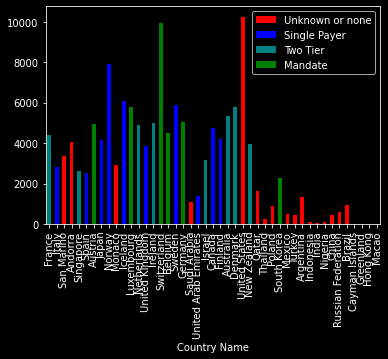

<Figure size 1800x3600 with 0 Axes>

In [52]:
#create the first visual using the 2017 per cap spending compared with the type of system and health ranking
#make a new dataframe with the necisary data
vis1_df = ranking 
vis1_df['2017 cost per capita'] = per_cap_spend['2017']
#drop additional rows
vis1_df=vis1_df.drop(['GDP total rank','GDP per capita Rank','year achieved universal health care','population 2020'],axis=1)
# Sort by health ranking
vis1_df = vis1_df.sort_values(by=['healthcare Rank','2017 cost per capita'],axis=0,na_position='last')
vis1_df.head()
#initialize graph
#set grouping colors for the various bars
colors = {0:'red', 1:'blue', 2:'teal',3:'green'}
vis1_df.plot(kind='bar',x='Country Name',y='2017 cost per capita',color=vis1_df['Type of system'].replace(colors)).legend([Patch(facecolor=colors[0]),Patch(facecolor=colors[1]),Patch(facecolor=colors[2]),Patch(facecolor=colors[3])], ['Unknown or none', 'Single Payer','Two Tier','Mandate'])
plt.show()